In [1]:
import pandas as pd

In [2]:
pressure2018 = pd.read_csv('./BattLeDIM/2018_SCADA_Pressures.csv', sep=';', decimal=',')
pressure2019 = pd.read_csv('./BattLeDIM/2019_SCADA_Pressures.csv', sep=';', decimal=',')

In [3]:
pressure2018

,Timestamp,n1,n4,n31,n54,n105,n114,n163,n188,n215,...,n549,n613,n636,n644,n679,n722,n726,n740,n752,n769
0,2018-01-01 00:00:00,28.92,33.87,37.13,37.13,50.52,53.99,52.56,55.32,39.09,...,54.80,56.16,45.53,47.62,47.33,46.14,47.12,43.81,49.17,48.50
1,2018-01-01 00:05:00,28.94,33.89,37.16,37.23,50.60,54.09,52.67,55.42,39.10,...,54.90,56.26,45.61,47.71,47.39,46.19,47.17,43.83,49.22,48.54
2,2018-01-01 00:10:00,28.96,33.91,37.18,37.21,50.57,54.05,52.64,55.39,39.09,...,54.87,56.24,45.61,47.71,47.41,46.20,47.19,43.84,49.24,48.56
3,2018-01-01 00:15:00,28.98,33.93,37.19,37.27,50.60,54.08,52.70,55.45,39.09,...,54.92,56.30,45.65,47.75,47.43,46.21,47.21,43.84,49.26,48.57
4,2018-01-01 00:20:00,28.98,33.93,37.19,37.14,50.53,54.00,52.57,55.32,39.09,...,54.80,56.17,45.54,47.64,47.34,46.15,47.13,43.81,49.17,48.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2018-12-31 23:35:00,28.55,33.61,36.93,36.88,50.42,53.88,52.34,55.09,39.09,...,54.64,55.90,45.34,47.40,47.12,45.98,46.90,43.73,48.94,48.33
105116,2018-12-31 23:40:00,28.56,33.61,36.94,36.82,50.38,53.82,52.28,55.03,39.09,...,54.59,55.85,45.31,47.37,47.11,45.97,46.89,43.72,48.93,48.33
105117,2018-12-31 23:45:00,28.58,33.64,36.96,36.90,50.43,53.88,52.35,55.11,39.10,...,54.66,55.92,45.36,47.44,47.16,46.01,46.95,43.74,48.98,48.36
105118,2018-12-31 23:50:00,28.58,33.64,36.96,36.85,50.40,53.86,52.31,55.06,39.09,...,54.63,55.87,45.31,47.37,47.10,45.97,46.89,43.73,48.93,48.32


In [4]:
pressure2018 = pressure2018.set_index('Timestamp')
pressure2019 = pressure2019.set_index('Timestamp')

In [5]:
pressure2018['n1'].iloc[0]

28.92

<AxesSubplot:xlabel='Timestamp'>

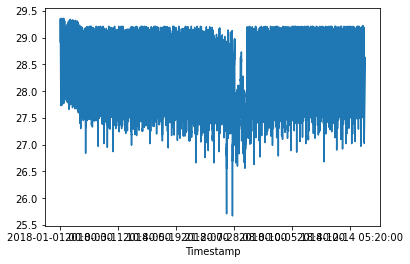

In [6]:
pressure2018['n1'].plot()

<AxesSubplot:xlabel='Timestamp'>

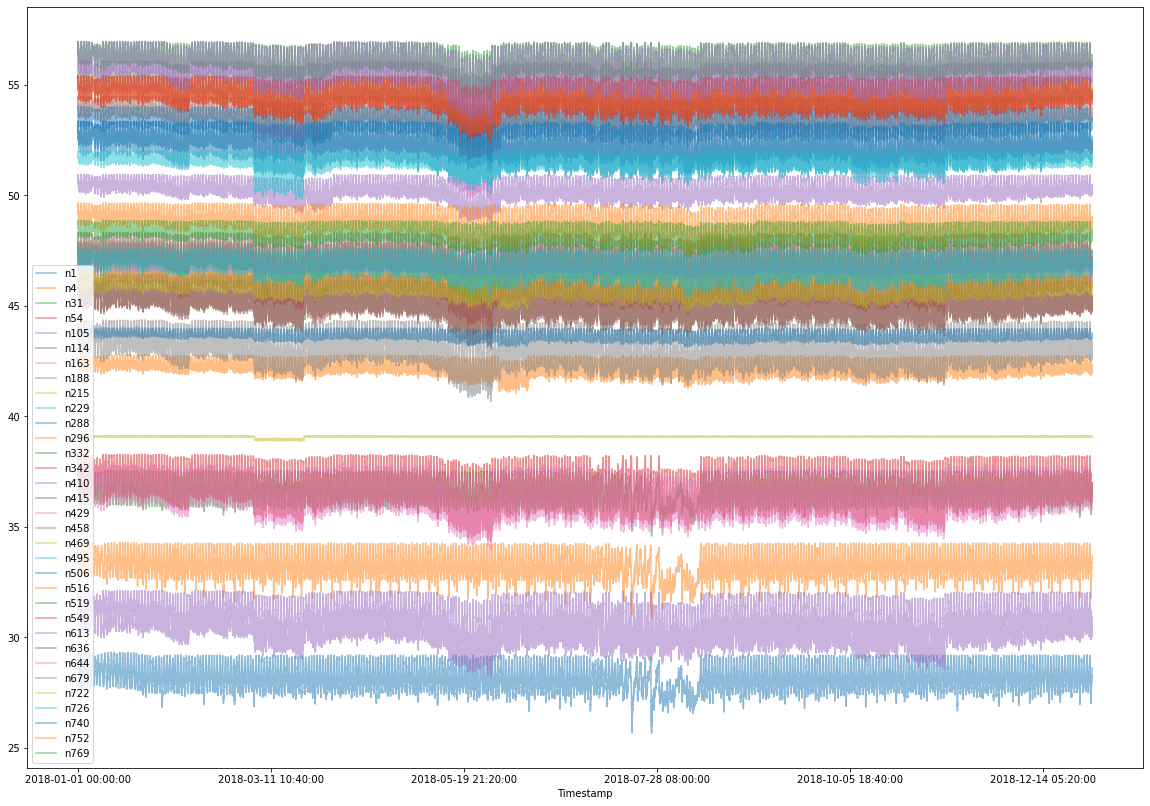

In [7]:
pressure2018.plot(figsize=(20,14), alpha=0.5)

/opt/anaconda3/envs/GraphBasedLearning/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
  from ipykernel import kernelapp as app
MovieWriter imagemagick unavailable; using Pillow instead.


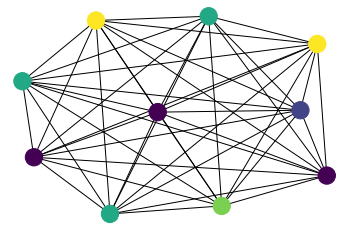

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation

# number of nodes
size = 10

# generate graph
G=nx.complete_graph(size)

# generating input frames here, since my data is too big
# its important that the frames go as input and is not generated
# on the fly
frame = np.random.random_integers(0, 5, (size, size)) # random ndarray between 0 and 5, length and number of frames = number of nodes in the graph

# draw the topology of the graph, what changes during animation
# is just the color
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G,pos)
edges = nx.draw_networkx_edges(G,pos)
plt.axis('off')

# pass frames to funcanimation via update function
# this is where I get stuck, since I cannot break
# out of the loop, neither can I read every array of
# the ndarray without looping over it explicitly
def update(i):
    # for i in range(len(frame)):
    # instead of giving frame as input, if I randomly generate it, then it works
    nc = frame[i] # np.random.randint(2, size=200)
    nodes.set_array(nc)
    return nodes,

# output animation; its important I save it
fig = plt.gcf()
ani = FuncAnimation(fig, update, interval=50, frames=range(size), blit=True)
ani.save('crap.gif', writer='imagemagick',  savefig_kwargs={'facecolor':'white'}, fps=1)
plt.show()

In [9]:
sensors = [1, 4, 31, 54, 105, 114, 163, 188, 215, 229, 288, 296, 332, 342, 
           410, 415, 429, 458, 469, 495, 506, 516, 519, 549, 613, 636, 644,
           679, 722, 726, 740, 752, 769]

In [10]:
pressure2018.columns = sensors

In [11]:
import numpy as np

In [12]:
records = pressure2018.iloc[0]

In [13]:
records.index

Int64Index([  1,   4,  31,  54, 105, 114, 163, 188, 215, 229, 288, 296, 332,
            342, 410, 415, 429, 458, 469, 495, 506, 516, 519, 549, 613, 636,
            644, 679, 722, 726, 740, 752, 769],
           dtype='int64')

In [14]:
sensors = pd.Series(data=1, index=records.index)

In [15]:
array1 = np.array(records.reindex(np.arange(1,783), fill_value=0.00))
array2 = np.array(sensors.reindex(np.arange(1,783), fill_value=0))

In [16]:
array1

array([28.92,  0.  ,  0.  , 33.87,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , 37.13,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 37.13,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  , 50.52,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  , 53.99,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,

In [17]:
test = pressure2018.T.reindex(list(range(1,783)),fill_value=0.0)

In [18]:
test

Timestamp,2018-01-01 00:00:00,2018-01-01 00:05:00,2018-01-01 00:10:00,2018-01-01 00:15:00,2018-01-01 00:20:00,2018-01-01 00:25:00,2018-01-01 00:30:00,2018-01-01 00:35:00,2018-01-01 00:40:00,2018-01-01 00:45:00,...,2018-12-31 23:10:00,2018-12-31 23:15:00,2018-12-31 23:20:00,2018-12-31 23:25:00,2018-12-31 23:30:00,2018-12-31 23:35:00,2018-12-31 23:40:00,2018-12-31 23:45:00,2018-12-31 23:50:00,2018-12-31 23:55:00
1,28.92,28.94,28.96,28.98,28.98,29.01,29.03,29.03,29.06,29.07,...,28.48,28.48,28.51,28.51,28.51,28.55,28.56,28.58,28.58,28.63
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,33.87,33.89,33.91,33.93,33.93,33.96,33.98,33.98,34.01,34.02,...,33.55,33.56,33.58,33.57,33.58,33.61,33.61,33.64,33.64,33.68
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
780,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
781,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [19]:
masks = np.array(test.mask(test>0.0,1).astype('int'))

In [20]:
test = np.array(pressure2018.T.reindex(list(range(1,783)),fill_value=0.0))

In [21]:
test.T.shape

(105120, 782)

In [22]:
masks.T.shape

(105120, 782)

In [23]:
result = np.stack((test,masks),axis=0).T

In [24]:
result.shape

(105120, 782, 2)

In [25]:
import numpy as np
import pandas as pd

def dataLoader(observed_nodes, n_nodes=782, path='./BattLeDIM/', file='2018_SCADA_Pressures.csv'):
    
    # Read the file at the passed destination into a Pandas DataFrame
    df = pd.read_csv(str(path + file), sep=';', decimal=',')
    
    # Set the 'Timestamp' column as the index
    df = df.set_index('Timestamp')
    
    # Set the column names as the numeric list passed into the function
    # which states what nodes of the graphs are observed
    df.columns = observed_nodes
    
    # Generate a temporary image of the DataFrame, that's been filled with zeros
    # at the un-observed nodes
    temp = df.T.reindex(list(range(1,n_nodes+1)),fill_value=0.0)
    
    # Create a "mask" array, that's set to 1 at the observed nodes and 0 otherwise
    arr2 = np.array(temp.mask(test>0.0,1).astype('int'))

    # Create a numpy array from the temporary image
    arr1 = np.array(temp)

    # Stack and transpose the observation and mask arrays
    result = np.stack((arr1,arr2),axis=0).T
    
    # Return the results
    return result

In [26]:
# Sensors are placed on the following nodes in the graph
sensors = [1  , 4  , 31 , 54 , 105, 114, 163, 188, 215, 229, 288, 
           296, 332, 342, 410, 415, 429, 458, 469, 495, 506, 516, 
           519, 549, 613, 636, 644, 679, 722, 726, 740, 752, 769]

# Load the data into a numpy array with format matching the GraphConvWat problem
data    = dataLoader(sensors,
                     n_nodes=782,
                     path='./BattLeDIM/',
                     file='2018_SCADA_Pressures.csv')

# Print information and instructions about the imported data
print("The imported sensor data has shape (i,n,d): {}".format(data.shape))
print("Where: ")
print("'i' is the number of observations: {}".format(data.shape[0]))
print("'n' is the number of nodes: {}".format(data.shape[1]))
print("'d' is a {}-dimensional vector consisting of the pressure value and a mask ".format(data.shape[2]))
print("The mask is set to '1' on observed nodes and '0' otherwise")

The imported sensor data has shape (i,n,d): (105120, 782, 2)
Where: 
'i' is the number of observations: 105120
'n' is the number of nodes: 782
'd' is a 2-dimensional vector consisting of the pressure value and a mask 
The mask is set to '1' on observed nodes and '0' otherwise


In [29]:
import yaml

Loader = yaml.load('./BattLeDIM/dataset_configuration.yml')

/opt/anaconda3/envs/GraphBasedLearning/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
with open('./BattLeDIM/dataset_configuration.yml') as file:
    data = yaml.load(file, Loader=yaml.FullLoader)

['n1', 'n4', 'n31', 'n54', 'n105', 'n114', 'n163', 'n188', 'n215', 'n229', 'n288', 'n296', 'n332', 'n342', 'n410', 'n415', 'n429', 'n458', 'n469', 'n495', 'n506', 'n516', 'n519', 'n549', 'n613', 'n636', 'n644', 'n679', 'n722', 'n726', 'n740', 'n752', 'n769']


In [32]:
pressure_sensors = data['pressure_sensors']

In [38]:
data

{'Comments': ['Configuration file for HISTORICAL and EVALUATION DATASET'],
 'Network': {'filename': 'L-TOWN_Real.inp'},
 'times': {'StartTime': '2018-01-01 00:00', 'EndTime': '2019-12-31 23:55'},
 'leakages': [None,
  'p257, 2018-01-08 13:30, 2019-12-31 23:55, 0.011843, incipient, 2018-01-25 08:30',
  'p461, 2018-01-23 04:25, 2018-04-02 11:40, 0.021320, incipient, 2018-03-27 20:35',
  'p232, 2018-01-31 02:35, 2018-02-10 09:20, 0.020108, incipient, 2018-02-03 16:05',
  'p427, 2018-02-13 08:25, 2019-12-31 23:55, 0.0090731, incipient, 2018-05-14 19:25',
  'p673, 2018-03-05 15:45, 2018-03-23 10:25, 0.022916, abrupt, 2018-03-05 15:45',
  'p810, 2018-07-28 03:05, 2019-12-31 23:55, 0.010028, incipient, 2018-11-02 22:25',
  'p628, 2018-05-02 14:55, 2018-05-29 21:20, 0.022318, incipient, 2018-05-16 08:00',
  'p538, 2018-05-18 08:35, 2018-06-02 06:05, 0.021731, abrupt, 2018-05-18 08:35',
  'p866, 2018-06-01 09:05, 2018-06-12 03:00, 0.018108, abrupt, 2018-06-01 09:05',
  'p31,  2018-06-28 10:35, 

In [36]:
pressure_sensors = [int(string.replace("n", "")) for string in data['pressure_sensors']]

In [37]:
pressure_sensors

[1,
 4,
 31,
 54,
 105,
 114,
 163,
 188,
 215,
 229,
 288,
 296,
 332,
 342,
 410,
 415,
 429,
 458,
 469,
 495,
 506,
 516,
 519,
 549,
 613,
 636,
 644,
 679,
 722,
 726,
 740,
 752,
 769]